# The Sparks Foundation - Data Science & Business Analytics Intern

# Task 1 : Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Objective : What will be predicted score if a student studies for 9.25 hrs/ day?

Level : Beginner

Author: Abdul Rafe Khan

IDE : Jupyter Notebook

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Book2.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0.5, 1.0, 'Scores vs Hour Studied')

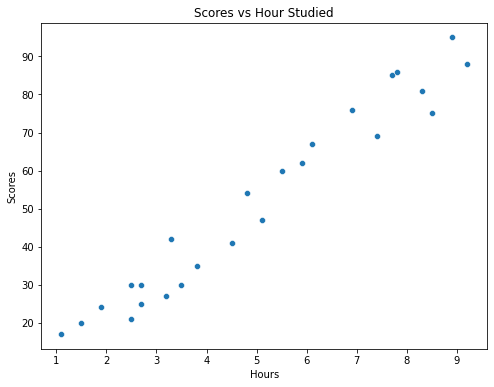

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hours',y="Scores",data=df)
plt.title("Scores vs Hour Studied")

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

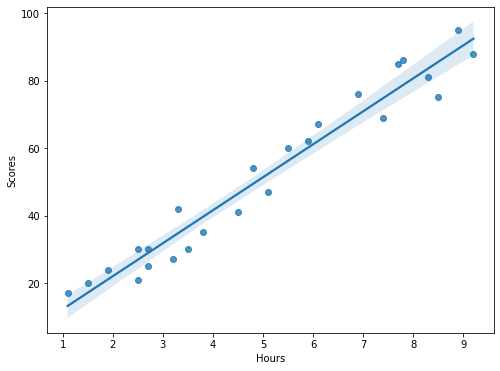

In [9]:
plt.figure(figsize=(8,6))
sns.regplot(x='Hours',y="Scores",data=df)

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

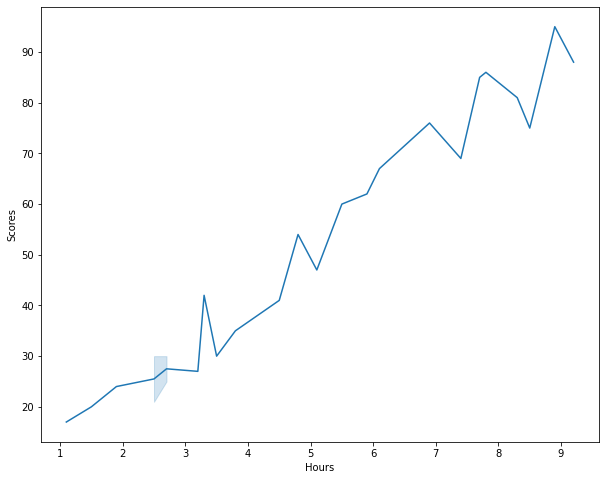

In [10]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Hours",y="Scores",data=df)
plt.show()

As the no. of hours increases Scores of the Student also increases, both are positively Correlated

<AxesSubplot:>

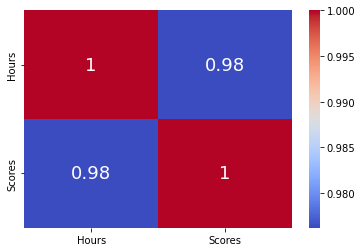

In [11]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':18},cmap='coolwarm')

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [14]:
Reg = LinearRegression()

In [15]:
Reg.fit(x_train,y_train)

LinearRegression()

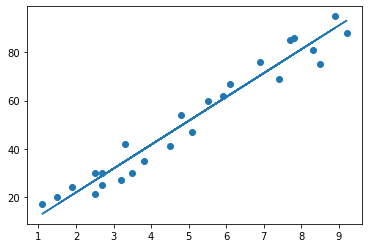

In [16]:
line = Reg.coef_*X + Reg.intercept_

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
y_pred = Reg.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
y_pred_train = Reg.predict(x_train)
print(y_pred_train)

[39.67865467 20.84840735 79.32128059 70.40168976 12.91988217 52.56250809
 78.33021494 34.72332643 84.27660883 93.19619966 62.47316457 36.70545772
 28.77693254 56.52677068 28.77693254 86.25874013 26.79480124 49.58931115
 90.22300272 46.6161142 ]


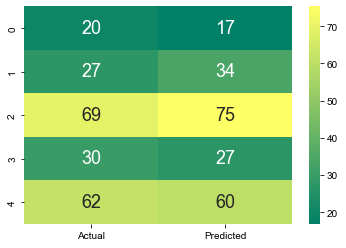

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
sns.heatmap(df,annot=True,annot_kws={'size':18},cmap = 'summer') 
sns.set(font_scale=1.5)

In [20]:
Hour = np.array(9.25)
Hour_2d = Hour.reshape(-1,1)
pred_hr = Reg.predict(Hour_2d)

print("The hour student studies is= {}".format(Hour))
print("The predicted score of the student will be = {}".format(pred_hr[0]))

The hour student studies is= 9.25
The predicted score of the student will be = 93.69173248737539


# The hour student studies is= 9.25
# The predicted score of the student will be = 93.69173248737539

# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We have choosen the metrics such as R2_Score, Mean absolute Error, Mean Squared Error etc.

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [22]:
score_model_test = r2_score(y_pred,y_test)
print("R2_Score of the testing data is: ",score_model_test*100)
score_model_train = r2_score(y_pred,y_test)
print("R2_Score of the testing data is: ",score_model_train*100)

R2_Score of the testing data is:  95.46785947197246
R2_Score of the testing data is:  95.46785947197246


In [23]:
mse = mean_squared_error(y_pred,y_test)
print("Mean Squared Error: ",mse)

Mean Squared Error:  21.598769307217456


In [24]:
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  4.183859899002982


Thank You